# Climate Change Sentiment Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I Ayomide Aladetuyi, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code]

Non-compliance with the honour code constitutes a material breach of contract.

### ExploreAI Academy Classification Hackathon
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [36]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

# Machine learning and natural language processing
from comet_ml import Experiment
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_selection
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

# Text processing and preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import CountVectorizer
import string


# Model training and evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix




# Data preprocessing and evaluation metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Filter and ignore specific warning types
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)



In [37]:
!pip install wordcloud

In [38]:
!pip install spacy

In [39]:
!pip install imbalanced-learn

### Loading experiments to Comet


In [40]:
# Setting the API key (saved as environment variable)
experiment = Experiment(
  api_key = "0Ul1D51ownEWaze4h5MR0OHnn",
  project_name = "explore-ds-classification-of-language-in-south-africa",
  workspace="ayoalade"
)



COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/ayoalade/explore-ds-classification-of-language-in-south-africa/514f6b2b9d234ddcbb61b530fa6eeb37
COMET INFO:   Parameters:
COMET INFO:     norm         : l2
COMET INFO:     smooth_idf   : True
COMET INFO:     sublinear_tf : False
COMET INFO:     use_idf      : True
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [41]:
# load the data
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

In [42]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [43]:
df_test.head(10)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [44]:
print("Train data:", df_train.shape)
print("Test data:", df_test.shape)

Train data: (33000, 2)
Test data: (5682, 2)


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### Missing values and blank strings 

In [45]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [46]:
df_test.isnull().sum()

index    0
text     0
dtype: int64

**Observation:**
* The training dataset has no null values within it.
* The test dataset has no null values within it.

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


**Observation:**
* It shows that we only have two numerical columns and one string column.
* However, we suspect that one of these columns (text) includes unique values in each row, whilst the other column (lang_id) represents our label, and so contains more than two different values.

**Action**
* To establish this guess, we write a function that will reveiw the unique values


In [48]:
# Get the unique labels from the 'lang_id' column in the df_train DataFrame
num_labels = list(df_train.lang_id.unique())
print(num_labels)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


In [49]:
# Get the number of unique tweet IDs in the df_train DataFrame
num_text = df_train.text.nunique()
print(num_text)

29948


In [50]:
# To Assert that the number of unique tweet IDs matches the total number of rows in the df_train DataFrame
num_text == df_train.shape[0]

False

**Observation:**
* 1 The language column contains 11 unique values.
afr - Afrikaans

eng - English

nbl - isiNdebele

nso - Sepedi

sot - Sesotho

ssw - siSwati

tsn - Setswana

tso - Xitsonga

ven - Tshivenda

xho - isiXhosa

zul - isiZulu

* 2 The text contains all unique value, which is the same as the number of rows, hence each value is a unique identifier for each tweet.

**Action**
lang_id will be used as the label (target variable)


**Features**

* lang_id: Which language a text belongs in (refer to Class Description above)

* text: Tweet body


In [51]:

df_class = df_train.copy()


# Print the updated DataFrame
df_class.head()


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [52]:
df_class['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

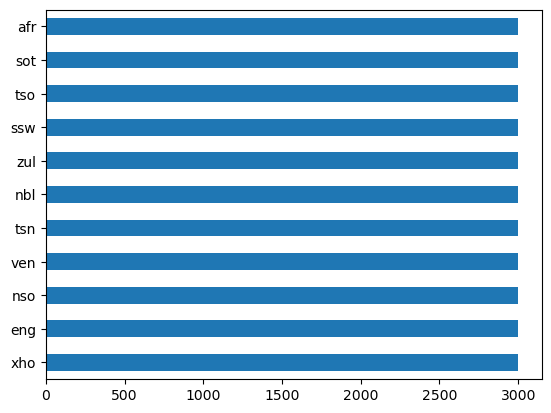

In [53]:
df_class['lang_id'].value_counts().plot(kind = 'barh')
plt.show()

### Tweet Preprocessing

The dataset contains punctuations, links, emojis and twitter specific characters like @ and # symbols. Words also exist in different cases which models might translate and different. Hence, the proceeding function performs cleaning by:
- Remove URLs
- Remove hastags and mentions
- Remove emojis and emoticons
- Remove puntuations, numbers
- Remove retweets and quotes, etc.

**Note: This preprossing is not for the data engineering rather for a better EDA**

In [54]:
# def preprocess_tweet(text):
#     # change the case of all the words in the text to lowercase 
#     text = text.lower()
    
#     # Remove links from the text
#     url = re.compile(r'https?://\S+|www\.\S+')
#     text =  url.sub(r'', text)
    
#     # remove punctuation
#     text = "".join([x for x in text if x not in string.punctuation])
    
#     # Remove Emojis - Emoji Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
#     emoji_pattern = re.compile("["
#                            u"\U0001F600-\U0001F64F"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            "]+", flags=re.UNICODE)
#     text = emoji_pattern.sub(r'', text)
    
#     '''# Correct mispelt word
#     spelling = SpellChecker()
#     correct_text = []
#     misspelt_words = spelling.unknown(text.split())
#     for word in text.split():
#         if word in misspelt_words:
#             correct_text.append(spelling.correction(word))
#         else:
#             correct_text.append(word)
#     text = " ".join(correct_text)'''
    
#     return text

In [57]:
import unicodedata
def clean_text (text):
    """
    This function will remove the noises from the DataFrame which include removing: links,
    hashtags, numbers, punctuations, acsii's and white spaces. 
    
    Before the function removes noise entities, it will convert the strings into lowercase
    
    Input is datatype 'str': text (noisy text)
    
    Output is datatype 'str': text (cleaned text)
    """
        
    #convert to lowercase
    text = text.lower()
    
    # Remove links from the text
    url = re.compile(r'https?://\S+|www\.\S+')
    text =  url.sub(r'', text)
 
    #remove numbers 
    text = re.sub(r'\d+','', text)
    
    #remove punctuation
    text = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', text)
    
    #remove acsii
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    #remove extra whitespaces 
    text = re.sub(r'\s\s+', ' ', text)
    
    #remove space in front of text
    text = text.lstrip(' ')
    
    return text

In [58]:
df_clean_train = df_train.copy()
df_tweet = df_clean_train["text"]
preprocessed_tweets = df_tweet.apply(clean_text)
df_clean_train["text"]=preprocessed_tweets

In [59]:
df_clean_test = df_test.copy()
df_tweet_test = df_clean_test["text"]
preprocessed_test_tweets = df_tweet_test.apply(clean_text)
df_clean_test["text"]=preprocessed_test_tweets

### Graphical Analysis

#### Visualizing the most reoccuring words

In [60]:
full_text = " ".join(df_clean_train['text'])

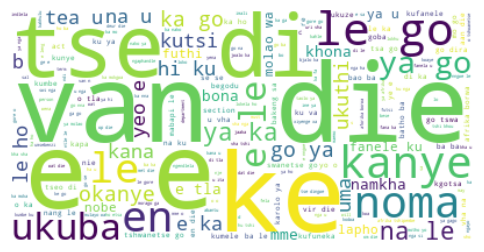

In [61]:
# Create a WordCloud object with white background
wc = WordCloud(background_color='white')

# Generate the word cloud using the 'full_text' variable
img = wc.generate(full_text)

# Create a figure with a size of 6x6 inches
plt.figure(figsize=(6,6))

# Display the word cloud image using imshow() function
plt.imshow(img, interpolation='bilinear')

# Remove the axes from the plot
plt.axis('off')

# Show the plot with the word cloud image
plt.show()


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

**Drop TweetId Feature**

The tweetId feature contains unique values across the feature. Hence, it will contribute little or nothing to the accuracy of the model. While weighing down the model in terms of computational cost.

**Text Tokenization**

In [62]:

def tokenize_text(text):
    # Tokenize the text using nltk
    tokens = nltk.word_tokenize(text)
    return tokens


The function above takes a row of text and return a list of each word in the text. <br /><br />

In [63]:
# Tokenize the train dataset
df_clean_train['text'] = df_clean_train['text'].apply(tokenize_text)

# Tokenize the test dataset
df_clean_test['text'] = df_clean_test['text'].apply(tokenize_text)

df_clean_train['text'].head()

0    [umgaqo-siseko, wenza, amalungiselelo, kumazik...
1    [i-dha, iya, kuba, nobulumko, bokubeka, umsebe...
2    [the, province, of, kwazulu-natal, department,...
3    [o, netefatsa, gore, o, ba, file, dilo, ka, mo...
4    [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...
Name: text, dtype: object

**Remove Stop Words**

Stop words are commonly used words in a language that often do not carry significant meaning and are frequently used as grammatical connectors or fillers. Examples of stop words in English include "the," "is," "and," "in," and "to." These words appear frequently in text but generally do not contribute much to the overall understanding or analysis of the text.

In [64]:
def remove_stop_words(list_of_words):
    # The function takes a list of words and filter out the stop words
    words = [word for word in list_of_words if word not in stopwords.words('english')]
    return words

In [65]:
# Remove stop words from train dataset
df_clean_train['text'] = df_clean_train['text'].apply(remove_stop_words)

# Remove stop words from test dataset
df_clean_test['text'] = df_clean_test['text'].apply(remove_stop_words)

df_clean_train['text'].head()

0    [umgaqo-siseko, wenza, amalungiselelo, kumazik...
1    [i-dha, iya, kuba, nobulumko, bokubeka, umsebe...
2    [province, kwazulu-natal, department, transpor...
3    [netefatsa, gore, ba, file, dilo, ka, moka, ts...
4    [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...
Name: text, dtype: object

**Stemming**

Stemming is a process in natural language processing (NLP) that involves reducing words to their base or root form, known as the lemma. The lemma represents the canonical or dictionary form of a word, from which all inflected forms can be generated.


In [66]:
from nltk.stem.porter import PorterStemmer

def stem_words(list_of_words):
    stemmer = PorterStemmer()
    return [stemmer.stem(x) for x in list_of_words]

In [67]:
# Stem train set
df_clean_train['text'] = df_clean_train['text'].apply(stem_words)

# Stem test set
df_clean_test['text'] = df_clean_test['text'].apply(stem_words)

After the lemmatization, we join the tokenized words together. This is to enable us create features from the field.

In [68]:
#Join all the words in the message field
df_clean_train['text'] = df_clean_train['text'].apply(lambda x: " ".join(x))
df_clean_test['text'] = df_clean_test['text'].apply(lambda x: " ".join(x))

### Features Extraction 

In [69]:

def vectorize_data(train, test):
    vectorizer = TfidfVectorizer(stop_words='english',min_df=1, ngram_range=(1, 2), max_df=0.5)
    train_data = vectorizer.fit_transform(train)
    test_data = vectorizer.transform(test)
    return train_data, test_data, vectorizer


In [70]:
#vectorize the train and test dataset
train_data, test_data, vectorizer = vectorize_data(df_clean_train['text'], df_clean_test['text'])


### Modelling

### Spliting Train Dataset 

To ensure proper model evaluation, it is essential to assess the model's performance on unseen data. Consequently, it is necessary to slipt the training dataset into two distinct subsets: the training dataset, utilized for model training, and the validation set, employed to evaluate the model's performance.

In [71]:
X_train, X_val, y_train, y_val = train_test_split(train_data, df_clean_train['lang_id'], test_size=0.2,  random_state=20)

In [72]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(26400, 691990)
(6600, 691990)
(26400,)
(6600,)


### Feature Selection

The dataset consists of a substantial number of features, precisely 69,408. However, not all of these features contribute positively to the model's performance. In fact, including all features can negatively impact both computational efficiency and overall performance. Therefore, it is crucial to select features that have a positive impact on the model's outcome. In this project, the KBest method was employed for feature selection.

In [73]:
# Set up selector, choosing score function and number of features to retain
selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=95000)

# Transform (i.e.: run selection on) the training data
train_x_new = selector_kbest.fit_transform(X_train, y_train)
valid_x_new = selector_kbest.transform(X_val)
all_train_new = selector_kbest.transform(train_data)
all_test_new = selector_kbest.transform(test_data)

C:\Users\a\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0 0 0 ... 0 0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\a\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


**Functions to create metrics and save an experiment**

In [74]:
def get_metrics(y_pred, y_test):
    metrics = {}
    metrics['precision'] = precision_score(y_test, y_pred, average=None)
    metrics['recall'] = recall_score(y_test, y_pred, average=None)
    metrics['f1-score'] = f1_score(y_test, y_pred, average=None)
    metrics['accuracy'] =  accuracy_score(y_test, y_pred)
    return metrics

In [75]:
def run_experiment(model, name, X_test, y_test):
   
    experiment.set_name(name)
    
    with experiment.validate():
        y_pred = model.predict(X_test)
        metrics = get_metrics(y_pred, y_test)
        experiment.log_metrics(metrics)
        experiment.log_confusion_matrix(y_test, y_pred)
        
    experiment.end()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

This project section primarily involves the development, training, and evaluation of classification models. The models are assessed using accuracy, precision, and recall metrics to determine the most suitable one for the desired objective.
|

In [76]:
names = ['Logistic Regression', 
         'Random Forest','ridge']

In [77]:
classifiers = [
    LogisticRegression(), 
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),    
    RidgeClassifier()
]

In [78]:

results = []
models = {}
confusion = {}
class_report = {}

for name, clf in zip(names, classifiers):
    print('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    print('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_val)
    
    print('... scoring')
    accuracy = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='micro')
    recall = metrics.recall_score(y_train, y_pred, average='micro')
    
    f1 = metrics.f1_score(y_train, y_pred, average='micro')
    f1_test = metrics.f1_score(y_val, y_pred_test, average='micro')
    
    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace=True)

print('... All done!')


Fitting Logistic Regression model...


C:\Users\a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting ridge model...
... predicting
... scoring
... All done!


In [81]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
ridge,1.000000,1.000000,1.000000,1.000000,0.997273,10.203667
Logistic Regression,0.999470,0.999470,0.999470,0.999470,0.994697,152.228974
Random Forest,0.095909,0.095909,0.095909,0.095909,0.087879,0.220922


This is way too many numbers to comprehend. Let's plot these values to see if we can make sense of them.

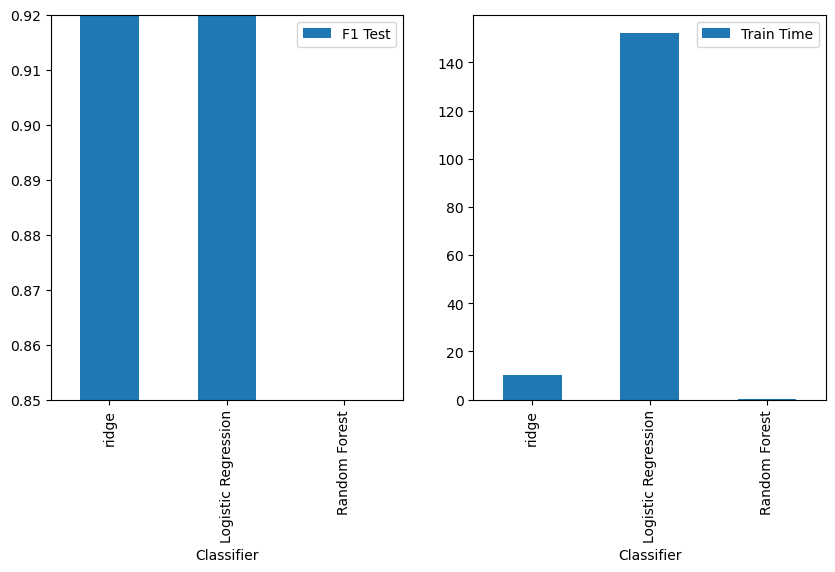

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.85,1.0])
results.plot(y='Train Time', kind='bar', ax=ax[1]);

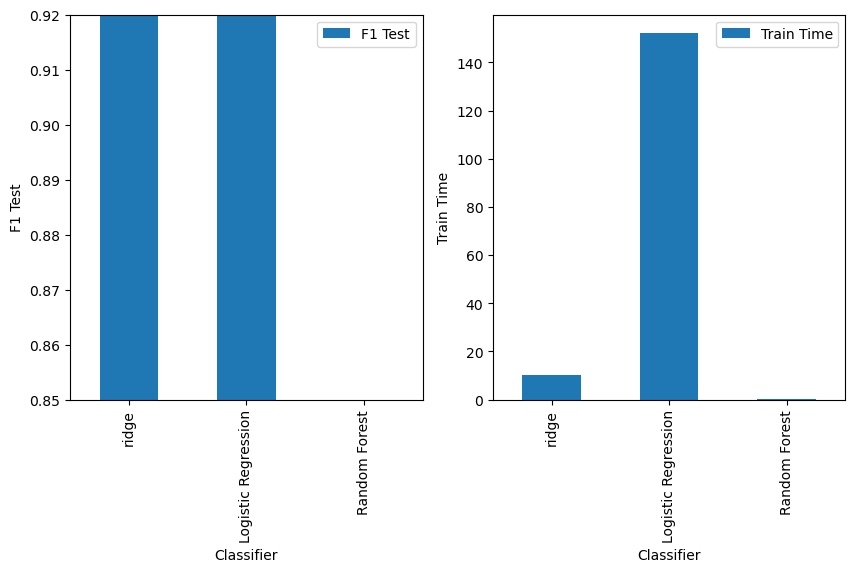

In [82]:
import matplotlib.pyplot as plt

# Sort the results DataFrame by 'F1 Train' column
results.sort_values('F1 Train', ascending=False, inplace=True)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the 'F1 Test' column as a bar chart
results.plot(y='F1 Test', kind='bar', ax=ax[0], xlim=[0, 1.1], ylim=[0.85, 1.0])
ax[0].set_ylabel('F1 Test')

# Plot the 'Train Time' column as a bar chart
results.plot(y='Train Time', kind='bar', ax=ax[1])
ax[1].set_ylabel('Train Time')

# Show the plots
plt.show()


### Ridge Classifier

In [93]:
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)
predictions = ridge_model.predict(X_val)
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       606
         eng       1.00      1.00      1.00       584
         nbl       1.00      0.99      0.99       617
         nso       1.00      0.99      1.00       637
         sot       1.00      1.00      1.00       566
         ssw       1.00      1.00      1.00       560
         tsn       0.99      1.00      1.00       599
         tso       1.00      1.00      1.00       606
         ven       1.00      1.00      1.00       614
         xho       0.99      1.00      1.00       629
         zul       0.99      1.00      0.99       582

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [95]:
# Create dictionaries for the data we want to log

params = {"random_state": 7,
          "model_type": "rf_model",
          "scaler": "standard scaler",
          "param_grid": str(param_grid),
          "stratify": True
          }
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }

**Run Experiments on Comet**

### Kaggle Submission

In [87]:
final_ridge_model = RidgeClassifier()
final_ridge_model.fit(train_data, df_clean_train['lang_id'])
predictions = final_ridge_model.predict(test_data)

In [92]:
submission = pd.DataFrame({'index':df_test["index"],'lang_id':predictions})
submission.to_csv('ridg_submission.csv', index=False)

predictions.shape

(5682,)